In [6]:

import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
file_path = '/content/imdb_top_1000.csv'
df = pd.read_csv(file_path)


In [9]:
df.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [10]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())
df['Gross'] = df['Gross'].fillna(df['Gross'].mean())

In [23]:
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')


In [11]:
sia = SentimentIntensityAnalyzer()
df['Sentiment_Compound'] = df['Overview'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [12]:
df['Success'] = np.where((df['IMDB_Rating'] >= 8.0) & (df['Gross'] > df['Gross'].median()), 1, 0)

In [13]:
feature_cols = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Sentiment_Compound']
X = df[feature_cols]
y = df['Success']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)


In [25]:
print(" Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy Score: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00        46

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [18]:
df['Main_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])  # take first genre listed
genre_sentiment = df.groupby('Main_Genre')['Sentiment_Compound'].mean().sort_values(ascending=False)


In [19]:
print("\n🎬 Average Sentiment per Genre:\n")
print(genre_sentiment)


🎬 Average Sentiment per Genre:

Main_Genre
Family       0.652500
Fantasy      0.018650
Comedy      -0.010852
Film-Noir   -0.021600
Animation   -0.072138
Adventure   -0.077936
Biography   -0.117292
Drama       -0.118899
Western     -0.191450
Horror      -0.260991
Mystery     -0.282808
Action      -0.328543
Crime       -0.384421
Thriller    -0.624900
Name: Sentiment_Compound, dtype: float64


<ipython-input-20-6203c3a872a4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sentiment.index, y=genre_sentiment.values, palette="viridis")


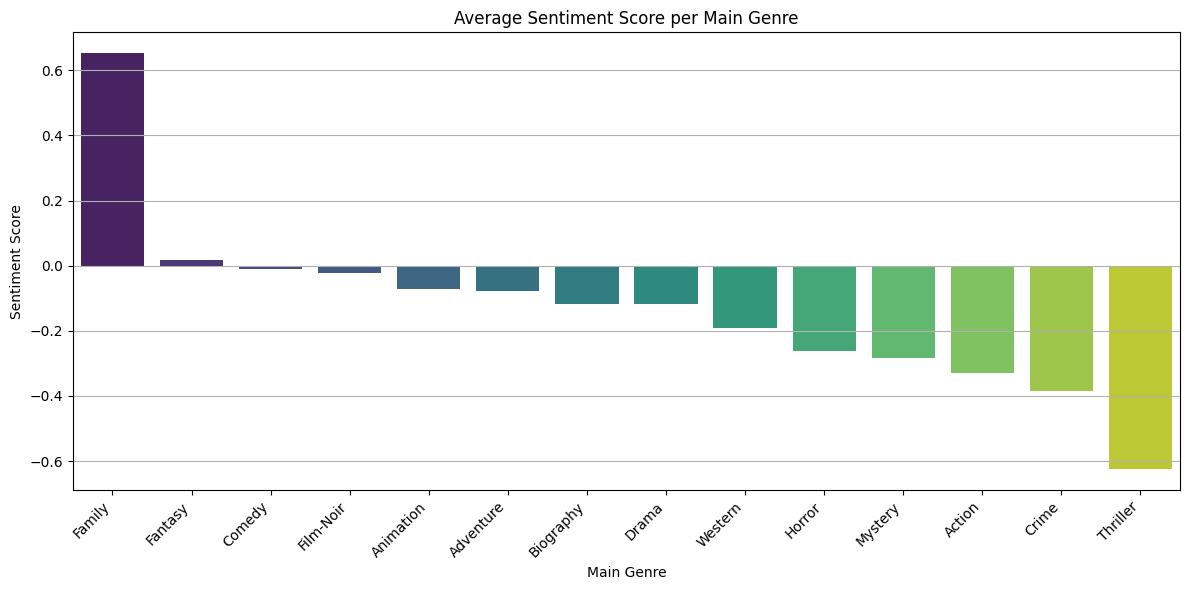

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. 📊 Genre vs Average Sentiment
plt.figure(figsize=(12,6))
sns.barplot(x=genre_sentiment.index, y=genre_sentiment.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Average Sentiment Score per Main Genre')
plt.ylabel('Sentiment Score')
plt.xlabel('Main Genre')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

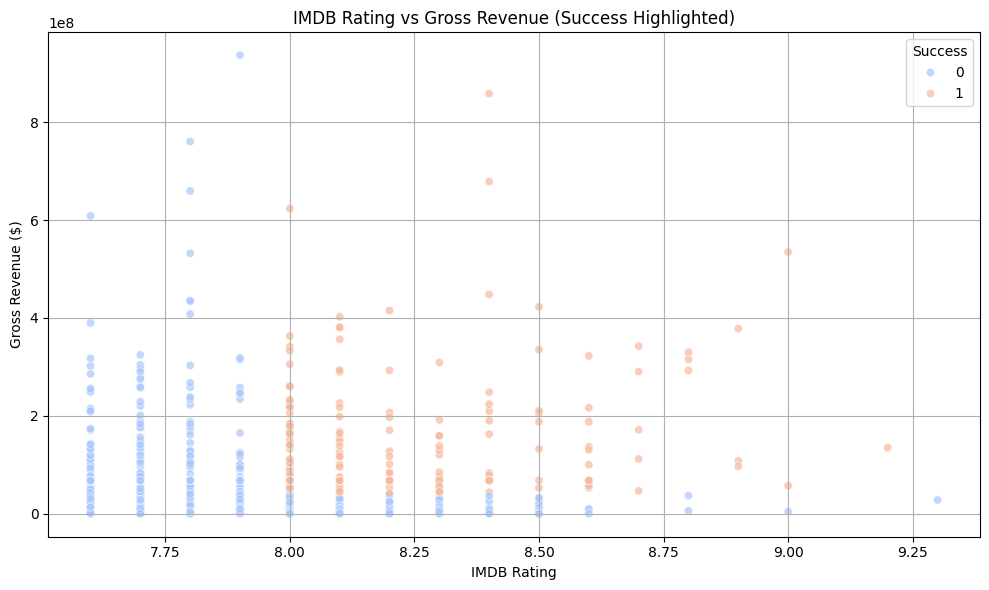

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='IMDB_Rating', y='Gross', hue='Success', palette='coolwarm', alpha=0.7)
plt.title('IMDB Rating vs Gross Revenue (Success Highlighted)')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-22-be9a31b4c996>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='magma')


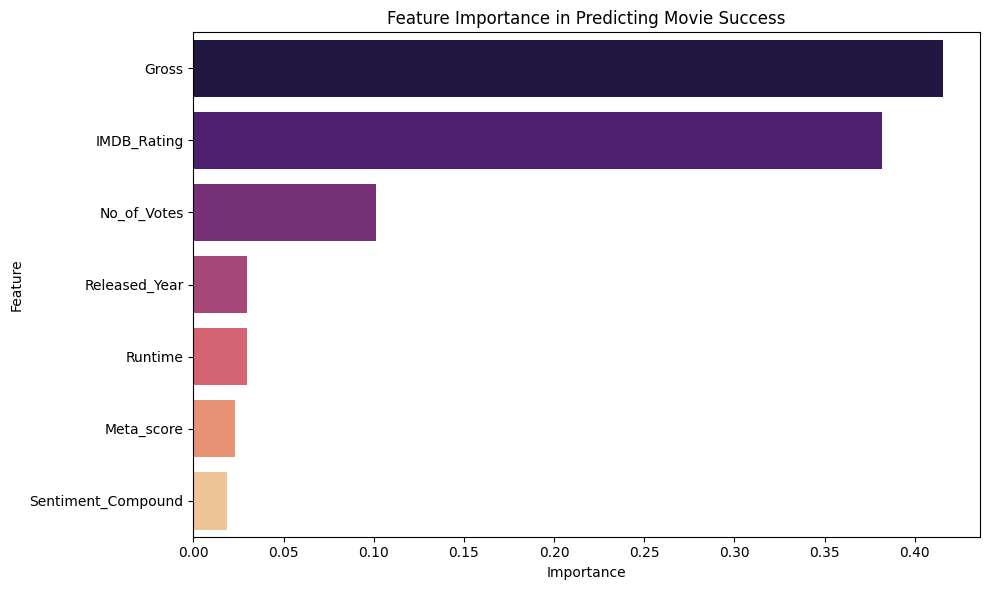

In [22]:
importances = model.feature_importances_
features = feature_cols

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='magma')
plt.title('Feature Importance in Predicting Movie Success')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

✅ Accuracy Score: 1.0

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00        46

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<ipython-input-24-94a7e41f95c0>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='inferno')


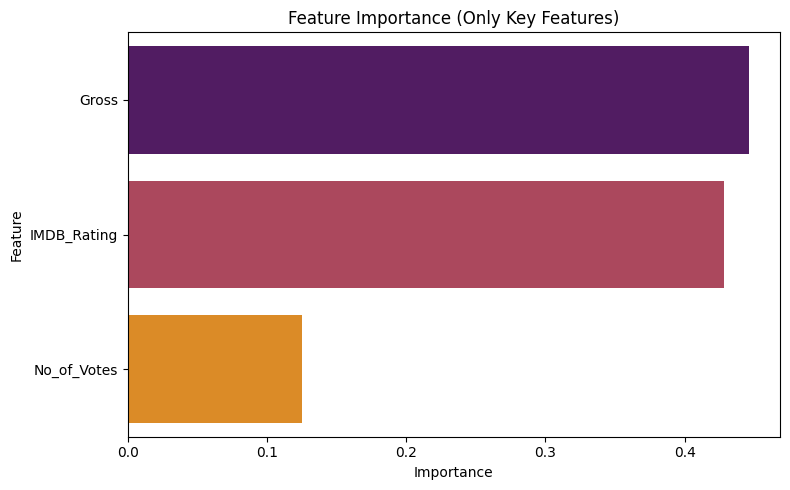